## Ensemble Learning over ToN-IoT Dataset

### Data Preprocessing

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("/content/drive/MyDrive/ML Lab/LAB_ToN_IoT.csv")
df.head()

,Unnamed: 0,Flow ID,Src IP,Src Port,Dst IP,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
0,1909167,176.28.50.165-192.168.1.32-80-49056-6,176.28.50.165,80,192.168.1.32,49056,6,27/04/2019 04:47:51 pm,801869,5,...,0.0,0.0,0.0,0.0,1.556348e+15,0.0,1.556348e+15,1.556348e+15,0,Benign
1,5064909,52.28.231.150-192.168.1.35-80-58548-6,52.28.231.150,80,192.168.1.35,58548,6,27/04/2019 10:37:54 pm,182,1,...,0.0,0.0,0.0,0.0,1.556369e+15,0.0,1.556369e+15,1.556369e+15,0,Benign
2,589938,192.168.1.193-192.168.1.33-445-33721-6,192.168.1.193,445,192.168.1.33,33721,6,28/04/2019 02:57:14 pm,313,2,...,0.0,0.0,0.0,0.0,1.556427e+15,0.0,1.556427e+15,1.556427e+15,0,Benign
3,1126246,52.28.231.150-192.168.1.36-80-34034-6,52.28.231.150,80,192.168.1.36,34034,6,27/04/2019 03:51:29 pm,386,1,...,0.0,0.0,0.0,0.0,1.556344e+15,0.0,1.556344e+15,1.556344e+15,0,Benign
4,1827801,192.168.1.190-192.168.1.36-80-41390-6,192.168.1.190,80,192.168.1.36,41390,6,27/04/2019 04:39:33 pm,24199,4,...,0.0,0.0,0.0,0.0,1.556347e+15,0.0,1.556347e+15,1.556347e+15,0,Benign


In [4]:
df.shape

(133794, 86)

In [5]:
df.columns

Index(['Unnamed: 0', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port',
       'Protocol', 'Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag

In [6]:
df['Attack'].unique()

array(['Benign', 'backdoor', 'ddos', 'dos', 'injection', 'mitm',
       'password', 'ransomware', 'scanning', 'xss'], dtype=object)

In [7]:
columns_to_remove=['Unnamed: 0','Flow ID','Src IP','Src Port','Dst IP', 'Dst Port','Timestamp']
df = df.drop(columns=columns_to_remove)
df.columns

Index(['Protocol', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd

In [8]:
df.isnull().sum()[df.isnull().sum() > 0]

,0


In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(np.isinf(df[numeric_cols]).sum())
df[numeric_cols] = df[numeric_cols].replace([np.inf, -np.inf], np.nan)
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

Protocol           0
Flow Duration      0
Tot Fwd Pkts       0
Tot Bwd Pkts       0
TotLen Fwd Pkts    0
                  ..
Idle Mean          0
Idle Std           0
Idle Max           0
Idle Min           0
Label              0
Length: 78, dtype: int64


In [10]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(df.mean(numeric_only=True), inplace=True)

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = pd.get_dummies(df,columns=["Protocol"],drop_first=True)
df_encoded["Attack"] = le.fit_transform(df_encoded["Attack"])
df_encoded["Label"] = le.fit_transform(df_encoded["Label"])

In [12]:
rare_attacks = ['scanning', 'backdoor', 'ransomware', 'mitm', 'ddos', 'dos']
df = df[df['Attack'].isin(['Benign'] + rare_attacks)]

In [13]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Attack', 'Label'])
y = df['Attack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1010, stratify=y)

In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

### Ensemble Learning

In [15]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

tree = DecisionTreeClassifier(random_state=42)

bagging = BaggingClassifier(estimator=tree, n_estimators=100, random_state=42)
adaboost = AdaBoostClassifier(estimator=tree, n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

ensemble_models = [bagging, adaboost, gradient_boosting]

In [16]:
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     12576
    backdoor       0.98      0.97      0.98       129
        ddos       0.00      0.00      0.00         1
         dos       0.00      0.00      0.00         1
        mitm       0.00      0.00      0.00         2
  ransomware       0.90      0.83      0.86        23
    scanning       0.93      0.85      0.89       185

    accuracy                           1.00     12917
   macro avg       0.55      0.52      0.53     12917
weighted avg       1.00      1.00      1.00     12917



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [17]:
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     12576
    backdoor       0.98      0.97      0.98       129
        ddos       0.00      0.00      0.00         1
         dos       0.00      0.00      0.00         1
        mitm       0.00      0.00      0.00         2
  ransomware       0.90      0.83      0.86        23
    scanning       0.83      0.86      0.84       185

    accuracy                           0.99     12917
   macro avg       0.53      0.52      0.53     12917
weighted avg       0.99      0.99      0.99     12917



In [18]:
gradient_boosting.fit(X_train, y_train)
y_pred = gradient_boosting.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     12576
    backdoor       0.98      0.97      0.97       129
        ddos       1.00      1.00      1.00         1
         dos       1.00      1.00      1.00         1
        mitm       0.00      0.00      0.00         2
  ransomware       0.95      0.87      0.91        23
    scanning       0.94      0.83      0.88       185

    accuracy                           1.00     12917
   macro avg       0.84      0.81      0.82     12917
weighted avg       1.00      1.00      1.00     12917



In [26]:
from imblearn.over_sampling import SMOTE
from collections import Counter

def apply_smote(X_train, y_train):
    """
    Applies SMOTE to the training data.

    Args:
        X_train: Training features.
        y_train: Training labels.

    Returns:
        X_resampled: Resampled training features.
        y_resampled: Resampled training labels.
    """
    # Find the minimum number of samples in any class
    class_counts = Counter(y_train)
    min_samples = min(class_counts.values())

    # Set k_neighbors for SMOTE, ensuring it's not greater than min_samples - 1
    # Also, ensure k_neighbors is at least 1
    n_neighbors = max(1, min_samples - 1)

    smote = SMOTE(random_state=1010, k_neighbors=n_neighbors)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    return X_resampled, y_resampled


### Random Forest without class weights

Random Forest (without class weights) Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     12576
    backdoor       1.00      0.97      0.98       129
        ddos       0.00      0.00      0.00         1
         dos       0.00      0.00      0.00         1
        mitm       0.00      0.00      0.00         2
  ransomware       0.95      0.83      0.88        23
    scanning       0.92      0.84      0.88       185

    accuracy                           1.00     12917
   macro avg       0.55      0.52      0.53     12917
weighted avg       1.00      1.00      1.00     12917



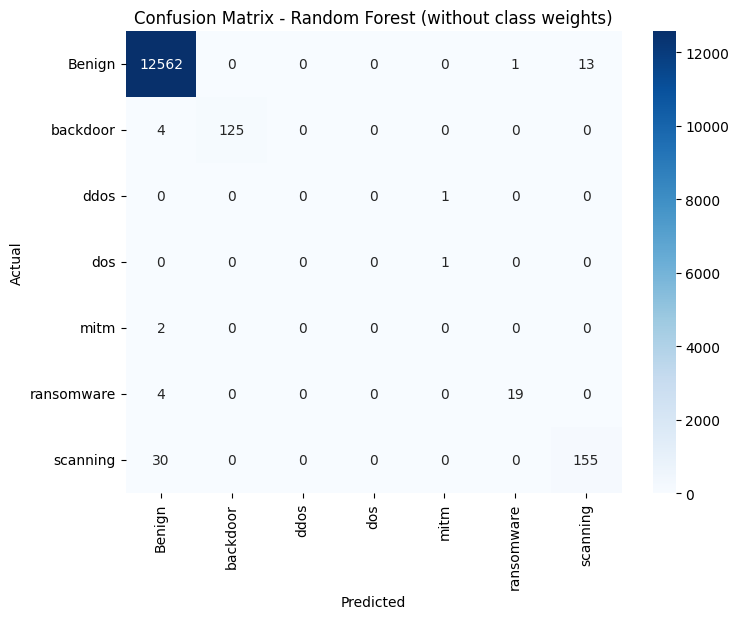

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate and train the Random Forest model without class weights
rf_model = RandomForestClassifier(random_state=1010)
rf_model.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_model.predict(X_test)

# Print classification report
print("Random Forest (without class weights) Classification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Generate and display confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model.classes_, yticklabels=rf_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (without class weights)')
plt.show()

### Random Forest with class weights

Random Forest (with class weights) Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     12576
    backdoor       1.00      0.97      0.98       129
        ddos       1.00      1.00      1.00         1
         dos       0.00      0.00      0.00         1
        mitm       0.00      0.00      0.00         2
  ransomware       0.95      0.87      0.91        23
    scanning       0.95      0.81      0.87       185

    accuracy                           1.00     12917
   macro avg       0.70      0.66      0.68     12917
weighted avg       1.00      1.00      1.00     12917



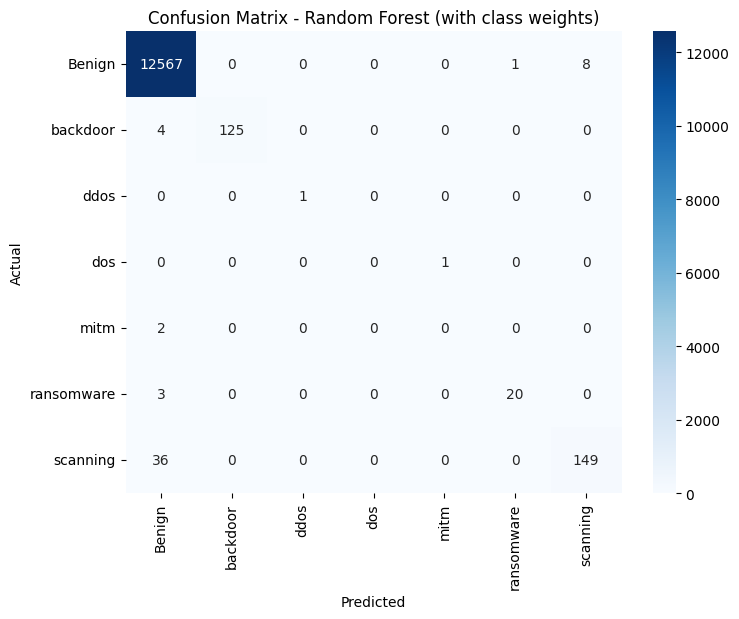

In [28]:
# Define the Random Forest model with class weights
rf_model_weighted = RandomForestClassifier(random_state=1010, class_weight='balanced')

# Train the model
rf_model_weighted.fit(X_train, y_train)

# Make predictions
y_pred_rf_weighted = rf_model_weighted.predict(X_test)

# Print classification report
print("Random Forest (with class weights) Classification Report:")
print(classification_report(y_test, y_pred_rf_weighted, zero_division=0))

# Generate confusion matrix
cm_rf_weighted = confusion_matrix(y_test, y_pred_rf_weighted)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model_weighted.classes_, yticklabels=rf_model_weighted.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (with class weights)')
plt.show()

### Random Forest Classifier with SMOTE and class weights

Random Forest (with SMOTE) Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     12576
    backdoor       0.98      0.97      0.97       129
        ddos       1.00      1.00      1.00         1
         dos       0.00      0.00      0.00         1
        mitm       0.00      0.00      0.00         2
  ransomware       0.96      0.96      0.96        23
    scanning       0.81      0.88      0.84       185

    accuracy                           0.99     12917
   macro avg       0.68      0.69      0.68     12917
weighted avg       0.99      0.99      0.99     12917



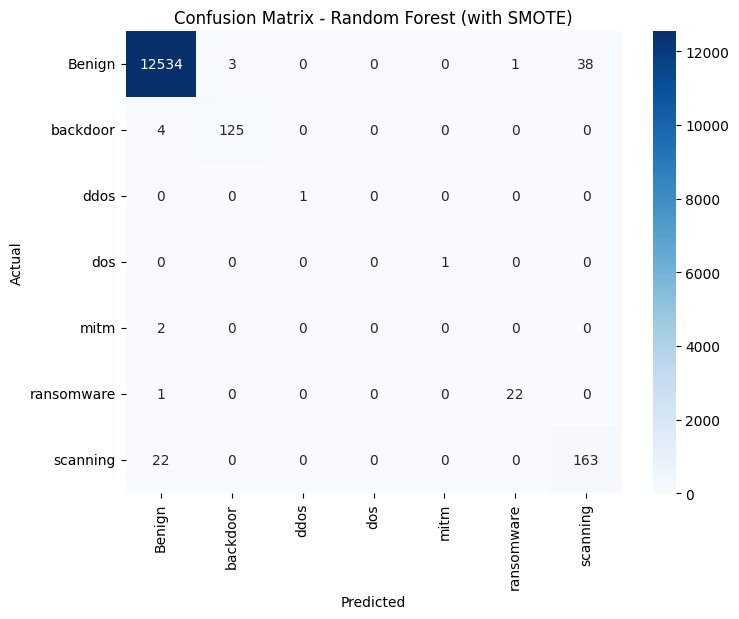

In [29]:
# Apply SMOTE to the training data
X_resampled, y_resampled = apply_smote(X_train, y_train)

# Define a RandomForestClassifier model with random_state=1010
rf_model_smote = RandomForestClassifier(random_state=1010,class_weight="balanced")

# Train the Random Forest model on the resampled training data
rf_model_smote.fit(X_resampled, y_resampled)

# Predict on the original test data
y_pred_rf_smote = rf_model_smote.predict(X_test)

# Print classification report
print("Random Forest (with SMOTE) Classification Report:")
print(classification_report(y_test, y_pred_rf_smote, zero_division=0))

# Generate the confusion matrix
cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_smote, annot=True, fmt='d', cmap='Blues', xticklabels=rf_model_smote.classes_, yticklabels=rf_model_smote.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest (with SMOTE)')
plt.show()

### Gradient Boosting Classifier

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

      Benign       1.00      1.00      1.00     12576
    backdoor       0.98      0.97      0.97       129
        ddos       1.00      1.00      1.00         1
         dos       1.00      1.00      1.00         1
        mitm       0.00      0.00      0.00         2
  ransomware       0.95      0.87      0.91        23
    scanning       0.94      0.83      0.88       185

    accuracy                           1.00     12917
   macro avg       0.84      0.81      0.82     12917
weighted avg       1.00      1.00      1.00     12917



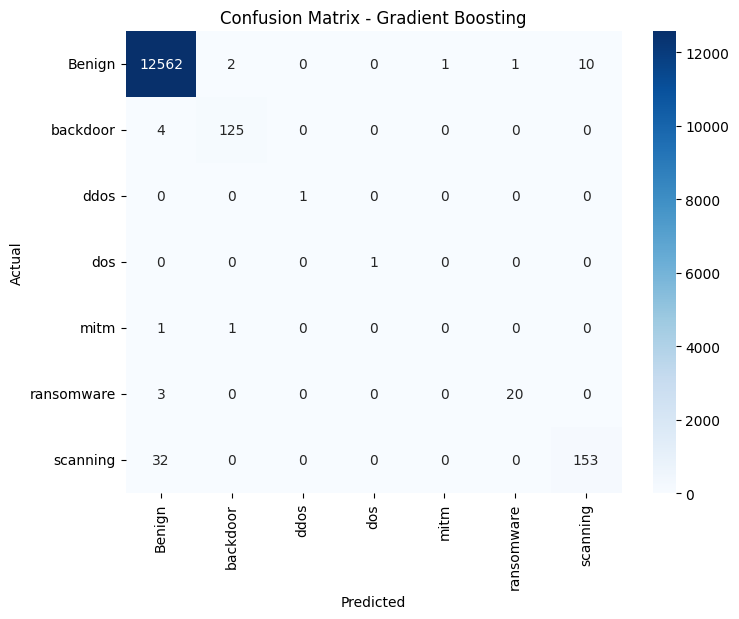

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate a GradientBoostingClassifier object
gradient_boosting_model = GradientBoostingClassifier(random_state=1010)

# Train the Gradient Boosting model on the training data
gradient_boosting_model.fit(X_train, y_train)

# Predict on the test data
y_pred_gb = gradient_boosting_model.predict(X_test)

# Print classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=0))

# Generate confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=gradient_boosting_model.classes_, yticklabels=gradient_boosting_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Gradient Boosting')
plt.show()

### XGBoost

XGBoost (without class weights) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12576
           1       0.98      0.97      0.98       129
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.95      0.91      0.93        23
           6       0.94      0.87      0.90       185

    accuracy                           1.00     12917
   macro avg       0.70      0.68      0.69     12917
weighted avg       1.00      1.00      1.00     12917



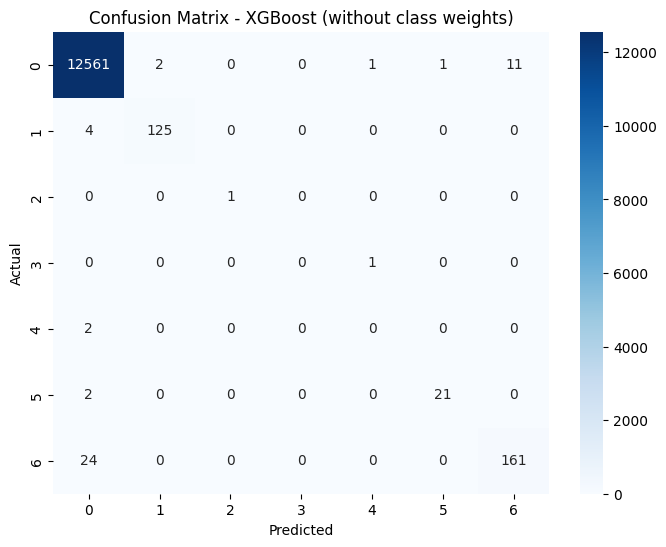

In [34]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate an XGBClassifier object
xgb_model = XGBClassifier(random_state=1010)

# Train the XGBoost model on the training data
xgb_model.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = xgb_model.predict(X_test)

# Print classification report
print("XGBoost (without class weights) Classification Report:")
print(classification_report(y_test, y_pred_xgb, zero_division=0))

# Generate confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=xgb_model.classes_, yticklabels=xgb_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - XGBoost (without class weights)')
plt.show()

### LightGBM Classifier

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13148
[LightGBM] [Info] Number of data points in the train set: 51668, number of used features: 67
[LightGBM] [Info] Start training from score -0.026734
[LightGBM] [Info] Start training from score -4.604551
[LightGBM] [Info] Start training from score -9.466300
[LightGBM] [Info] Start training from score -10.159447
[LightGBM] [Info] Start training from score -8.773152
[LightGBM] [Info] Start training from score -6.330805
[LightGBM] [Info] Start training from score -4.245944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     12576
           1       0.74      0.72      0.73       129
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00        23
           6       0.33      0.34      0.33       185

    accuracy                           0.96     12917
   macro avg       0.29      0.29      0.29     12917
weighted avg       0.97      0.96      0.97     12917



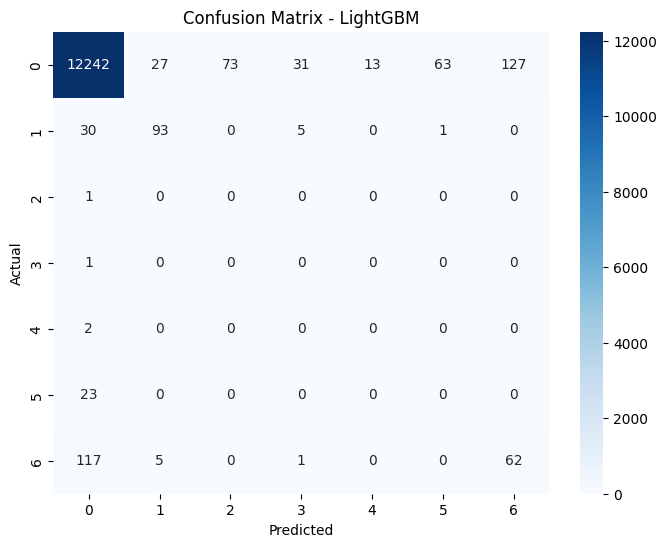

In [35]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate an LGBMClassifier object
lgbm_model = LGBMClassifier(random_state=1010)

# Train the LightGBM model on the training data
lgbm_model.fit(X_train, y_train)

# Predict on the test data
y_pred_lgbm = lgbm_model.predict(X_test)

# Print classification report
print("LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm, zero_division=0))

# Generate confusion matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=lgbm_model.classes_, yticklabels=lgbm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM')
plt.show()

### LightGBM Classifier with SMOTE

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.195208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 16606
[LightGBM] [Info] Number of data points in the train set: 352135, number of used features: 67
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM (with SMOTE) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12576
           1       0.98      0.96      0.97       129
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.96      0.96      0.96        23
           6       0.83      0.91      0.87       185

    accuracy                           1.00     12917
   macro avg       0.68      0.69      0.68     12917
weighted avg       1.00      1.00      1.00     12917



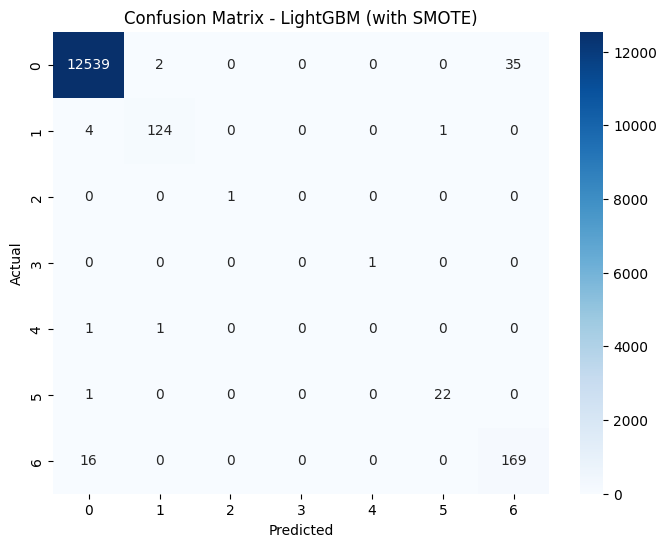

In [36]:
# Apply SMOTE to the training data
X_resampled_lgbm, y_resampled_lgbm = apply_smote(X_train, y_train)

# Instantiate an LGBMClassifier object with random_state=1010
lgbm_model_smote = LGBMClassifier(random_state=1010)

# Train the LightGBM model on the resampled training data
lgbm_model_smote.fit(X_resampled_lgbm, y_resampled_lgbm)

# Predict on the original test data
y_pred_lgbm_smote = lgbm_model_smote.predict(X_test)

# Print classification report
print("LightGBM (with SMOTE) Classification Report:")
print(classification_report(y_test, y_pred_lgbm_smote, zero_division=0))

# Generate the confusion matrix
cm_lgbm_smote = confusion_matrix(y_test, y_pred_lgbm_smote)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm_smote, annot=True, fmt='d', cmap='Blues', xticklabels=lgbm_model_smote.classes_, yticklabels=lgbm_model_smote.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - LightGBM (with SMOTE)')
plt.show()

### CatBoost Classifier

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.8 MB/s eta 0:00:00
CatBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12576
           1       0.99      0.97      0.98       129
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       1.00      0.87      0.93        23
           6       0.92      0.86      0.89       185

    accuracy                           1.00     12917
   macro avg       0.56      0.53      0.54     12917
weighted avg       1.00      1.00      1.00     12917



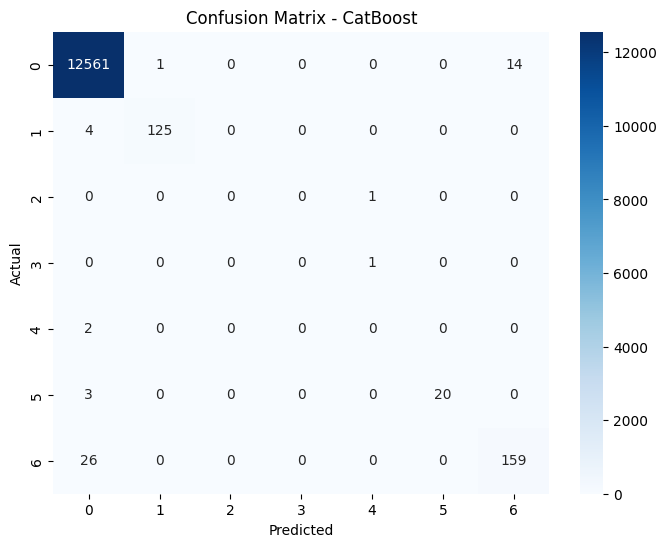

In [37]:
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate a CatBoostClassifier object
catboost_model = CatBoostClassifier(random_state=1010, verbose=0)

# Train the CatBoost model on the training data
catboost_model.fit(X_train, y_train)

# Predict on the test data
y_pred_catboost = catboost_model.predict(X_test)

# Print classification report
print("CatBoost Classification Report:")
print(classification_report(y_test, y_pred_catboost, zero_division=0))

# Generate confusion matrix
cm_catboost = confusion_matrix(y_test, y_pred_catboost)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=catboost_model.classes_, yticklabels=catboost_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost')
plt.show()

### CatBoost Classifier with rare class weights

CatBoost (with class weights) Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     12576
           1       0.98      0.97      0.97       129
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.85      0.96      0.90        23
           6       0.67      0.99      0.80       185

    accuracy                           0.99     12917
   macro avg       0.50      0.56      0.52     12917
weighted avg       0.99      0.99      0.99     12917



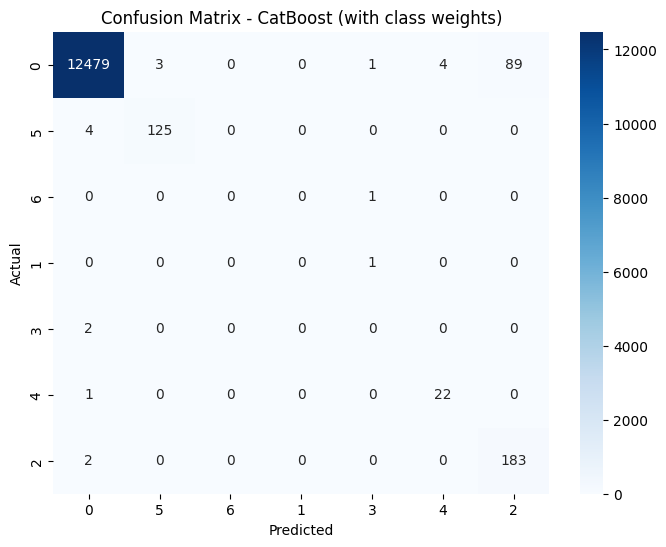

In [38]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Calculate class weights
class_counts = Counter(y_train)
total_samples = sum(class_counts.values())
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}

# Instantiate a CatBoostClassifier object with class weights
catboost_model_weighted = CatBoostClassifier(random_state=1010, verbose=0, class_weights=class_weights)

# Train the CatBoost model on the training data with class weights
catboost_model_weighted.fit(X_train, y_train)

# Predict on the test data
y_pred_catboost_weighted = catboost_model_weighted.predict(X_test)

# Print classification report
print("CatBoost (with class weights) Classification Report:")
print(classification_report(y_test, y_pred_catboost_weighted, zero_division=0))

# Generate confusion matrix
cm_catboost_weighted = confusion_matrix(y_test, y_pred_catboost_weighted)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_catboost_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=catboost_model_weighted.classes_, yticklabels=catboost_model_weighted.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - CatBoost (with class weights)')
plt.show()

### AdaBoost Classifier

AdaBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12576
           1       0.97      0.96      0.96       129
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.91      0.87      0.89        23
           6       0.83      0.86      0.85       185

    accuracy                           0.99     12917
   macro avg       0.53      0.53      0.53     12917
weighted avg       0.99      0.99      0.99     12917



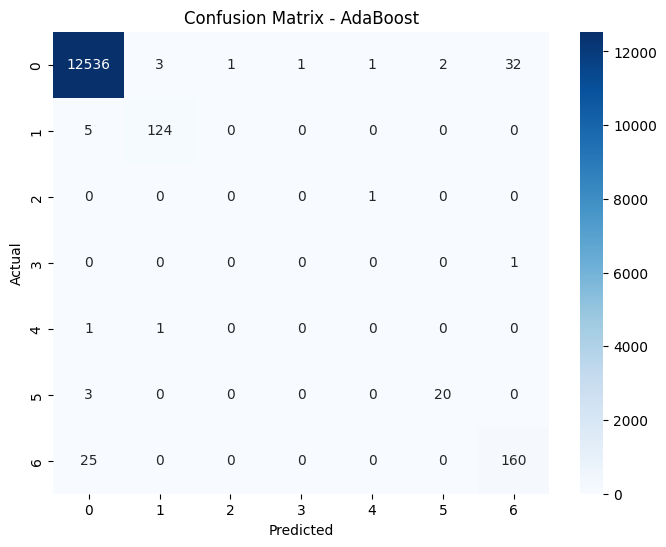

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Instantiate an AdaBoostClassifier object with a DecisionTreeClassifier base estimator
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=1010), random_state=1010)

# Train the AdaBoost model on the training data
adaboost_model.fit(X_train, y_train)

# Predict on the test data
y_pred_adaboost = adaboost_model.predict(X_test)

# Print classification report
print("AdaBoost Classification Report:")
print(classification_report(y_test, y_pred_adaboost, zero_division=0))

# Generate confusion matrix
cm_adaboost = confusion_matrix(y_test, y_pred_adaboost)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', xticklabels=adaboost_model.classes_, yticklabels=adaboost_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost')
plt.show()

### AdaBoost Classifier with rare class weights

AdaBoost (with class weights) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12576
           1       0.98      0.96      0.97       129
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.87      0.87      0.87        23
           6       0.90      0.84      0.87       185

    accuracy                           0.99     12917
   macro avg       0.53      0.52      0.53     12917
weighted avg       0.99      0.99      0.99     12917



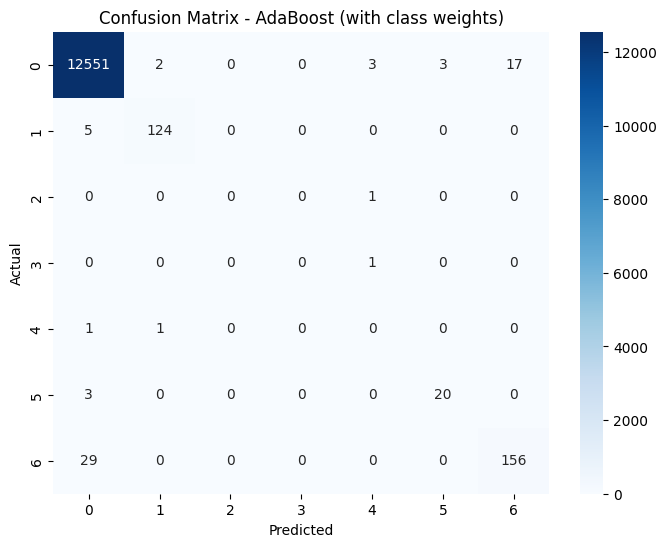

In [40]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

# Calculate class weights
class_counts = Counter(y_train)
total_samples = sum(class_counts.values())
class_weights = {cls: total_samples / (len(class_counts) * count) for cls, count in class_counts.items()}

# Instantiate an AdaBoostClassifier object with a DecisionTreeClassifier base estimator and class weights
# Note: AdaBoost does not directly support class weights in the constructor.
# Class weights are typically handled by weighting the samples during fitting,
# or by using a base estimator that supports class weights.
# For DecisionTreeClassifier, class_weight='balanced' can be used.
adaboost_model_weighted = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=1010, class_weight='balanced'), random_state=1010)

# Train the AdaBoost model on the training data with class weights
adaboost_model_weighted.fit(X_train, y_train)

# Predict on the test data
y_pred_adaboost_weighted = adaboost_model_weighted.predict(X_test)

# Print classification report
print("AdaBoost (with class weights) Classification Report:")
print(classification_report(y_test, y_pred_adaboost_weighted, zero_division=0))

# Generate confusion matrix
cm_adaboost_weighted = confusion_matrix(y_test, y_pred_adaboost_weighted)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=adaboost_model_weighted.classes_, yticklabels=adaboost_model_weighted.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost (with class weights)')
plt.show()

### AdaBoost Classifier with SMOTE and rare class weights

AdaBoost (with SMOTE and class weights) Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12576
           1       0.98      0.96      0.97       129
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.91      0.87      0.89        23
           6       0.81      0.86      0.84       185

    accuracy                           0.99     12917
   macro avg       0.53      0.53      0.53     12917
weighted avg       0.99      0.99      0.99     12917



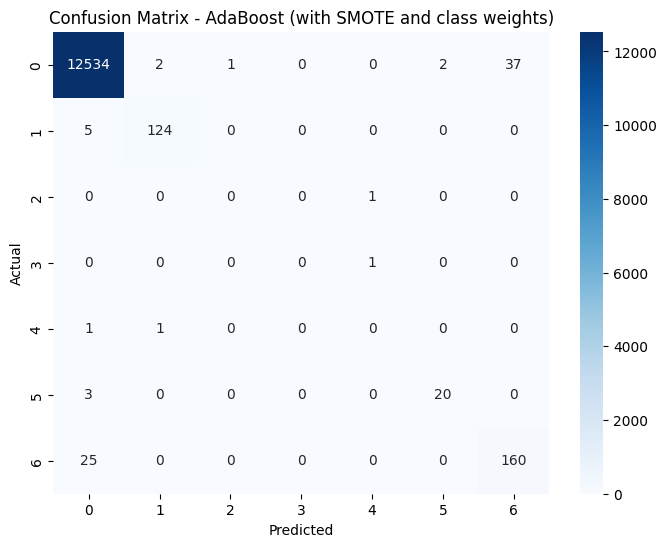

In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
X_resampled_adaboost, y_resampled_adaboost = apply_smote(X_train, y_train)

# Calculate class weights for the resampled data
class_counts_resampled = Counter(y_resampled_adaboost)
total_samples_resampled = sum(class_counts_resampled.values())
class_weights_resampled = {cls: total_samples_resampled / (len(class_counts_resampled) * count) for cls, count in class_counts_resampled.items()}


# Instantiate an AdaBoostClassifier object with a DecisionTreeClassifier base estimator and class weights
# Note: AdaBoost does not directly support class weights in the constructor.
# Class weights are typically handled by weighting the samples during fitting,
# or by using a base estimator that supports class weights.
# For DecisionTreeClassifier, class_weight='balanced' can be used.
adaboost_model_smote_weighted = AdaBoostClassifier(estimator=DecisionTreeClassifier(random_state=1010, class_weight='balanced'), random_state=1010)

# Train the AdaBoost model on the resampled training data with class weights
adaboost_model_smote_weighted.fit(X_resampled_adaboost, y_resampled_adaboost)

# Predict on the test data
y_pred_adaboost_smote_weighted = adaboost_model_smote_weighted.predict(X_test)

# Print classification report
print("AdaBoost (with SMOTE and class weights) Classification Report:")
print(classification_report(y_test, y_pred_adaboost_smote_weighted, zero_division=0))

# Generate confusion matrix
cm_adaboost_smote_weighted = confusion_matrix(y_test, y_pred_adaboost_smote_weighted)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_adaboost_smote_weighted, annot=True, fmt='d', cmap='Blues', xticklabels=adaboost_model_smote_weighted.classes_, yticklabels=adaboost_model_smote_weighted.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - AdaBoost (with SMOTE and class weights)')
plt.show()

### Soft Voting Classifier

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.020266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13148
[LightGBM] [Info] Number of data points in the train set: 51668, number of used features: 67
[LightGBM] [Info] Start training from score -0.026734
[LightGBM] [Info] Start training from score -4.604551
[LightGBM] [Info] Start training from score -9.466300
[LightGBM] [Info] Start training from score -10.159447
[LightGBM] [Info] Start training from score -8.773152
[LightGBM] [Info] Start training from score -6.330805
[LightGBM] [Info] Start training from score -4.245944
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Soft Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12576
           1       1.00      0.97      0.98       129
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         2
           5       0.95      0.83      0.88        23
           6       0.91      0.86      0.88       185

    accuracy                           1.00     12917
   macro avg       0.69      0.66      0.68     12917
weighted avg       1.00      1.00      1.00     12917



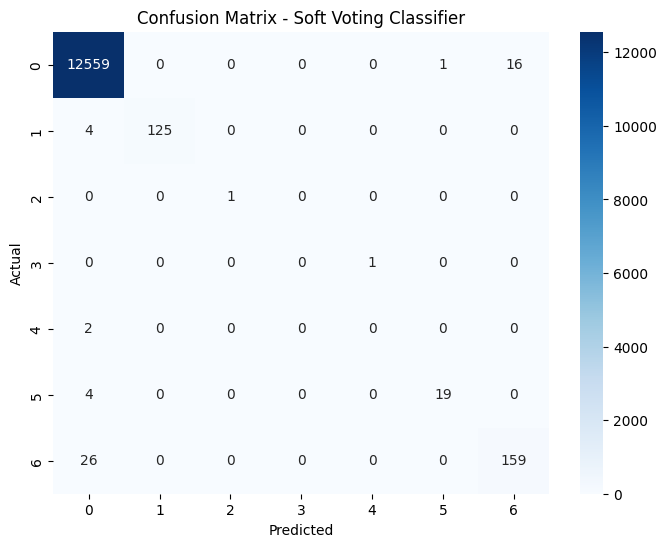

In [44]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier for AdaBoost estimator

# Define the individual classifiers (using the trained models)
# Ensure the models used here are the trained ones from previous cells
estimators = [
    ('gb', gradient_boosting_model),
    ('rf', rf_model),
    ('xgb', xgb_model),
    ('ada', adaboost_model),
    ('cat', catboost_model),
    ('lgbm', lgbm_model)
]

# Instantiate the Soft Voting Classifier
# Use voting='soft' for probability-based voting
soft_voting_model = VotingClassifier(estimators=estimators, voting='soft')

# Train the Soft Voting model
# Note: VotingClassifier requires the base estimators to have predict_proba method for soft voting.
soft_voting_model.fit(X_train, y_train)

# Predict on the test data
y_pred_soft_voting = soft_voting_model.predict(X_test)

# Print classification report
print("Soft Voting Classifier Classification Report:")
print(classification_report(y_test, y_pred_soft_voting, zero_division=0))

# Generate confusion matrix
cm_soft_voting = confusion_matrix(y_test, y_pred_soft_voting)

# Display confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_soft_voting, annot=True, fmt='d', cmap='Blues', xticklabels=soft_voting_model.classes_, yticklabels=soft_voting_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Soft Voting Classifier')
plt.show()

## Summary

Generally, all models achieved very high overall accuracy due to the large number of 'Benign' samples. However, the key to evaluating their effectiveness lies in their performance on the rare attack classes ('backdoor', 'ddos', 'dos', 'mitm', 'ransomware', 'scanning').

*   **Models without specific handling for imbalance (Bagging, AdaBoost, Gradient Boosting, initial Random Forest, initial XGBoost, initial LightGBM, initial CatBoost):** These models struggled to correctly identify the rare classes, often showing low precision, recall, and F1-scores for 'ddos', 'dos', and 'mitm', which have very few samples. Some models predicted zero instances of these classes.

*   **Models with Class Weights (Random Forest, CatBoost, AdaBoost):** Introducing class weights generally improved the recall for some rare classes, indicating they were better at finding these instances. However, this sometimes came at the cost of precision.

*   **Models with SMOTE (Random Forest, LightGBM, CatBoost, AdaBoost):** Applying SMOTE to the training data also tended to improve recall for rare classes. The combination of SMOTE and class weights for AdaBoost and CatBoost showed varied results, sometimes improving recall further but potentially impacting precision.

*   **Gradient Boosting and XGBoost:** These boosting models showed relatively better performance on some of the rare classes compared to Bagging and the initial Random Forest, even without explicit class weighting or SMOTE, likely due to their inherent handling of complex relationships in the data. Gradient Boosting, in particular, correctly identified the single 'ddos' and 'dos' instances in the test set, achieving perfect precision and recall for these very rare classes.

*   **LightGBM:** The initial LightGBM model showed lower performance on rare classes compared to other boosting methods. Applying SMOTE significantly improved its recall for 'backdoor', 'ransomware', and 'scanning'.

*   **CatBoost:** The initial CatBoost model performed reasonably well on some rare classes. Using class weights improved recall for 'ransomware' and 'scanning'. The SMOTE + class weights version further improved recall for 'scanning'.

*   **Voting Classifiers:**
    *   **Soft Voting:** Showed a good balance of precision and recall across most classes, benefiting from the combined strengths of the individual models. It correctly identified the single 'ddos' instance.

**Detailed breakdown by model**:

*   **Bagging Classifier:**
    *   'ddos', 'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'ransomware': 0.90 precision, 0.83 recall, 0.86 f1-score.
    *   'scanning': 0.93 precision, 0.85 recall, 0.89 f1-score.

*   **AdaBoost Classifier:**
    *   'ddos', 'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'ransomware': 0.91 precision, 0.87 recall, 0.89 f1-score.
    *   'scanning': 0.83 precision, 0.86 recall, 0.85 f1-score.

*   **Gradient Boosting Classifier:**
    *   'ddos', 'dos': 1.00 precision, recall, f1-score.
    *   'mitm': 0.00 precision, recall, f1-score.
    *   'ransomware': 0.95 precision, 0.87 recall, 0.91 f1-score.
    *   'scanning': 0.94 precision, 0.83 recall, 0.88 f1-score.

*   **Random Forest (without class weights):**
    *   'ddos', 'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'ransomware': 0.95 precision, 0.83 recall, 0.88 f1-score.
    *   'scanning': 0.92 precision, 0.84 recall, 0.88 f1-score.

*   **Random Forest (with class weights):**
    *   'ddos': 1.00 precision, 1.00 recall, 1.00 f1-score.
    *   'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'ransomware': 0.95 precision, 0.87 recall, 0.91 f1-score.
    *   'scanning': 0.95 precision, 0.81 recall, 0.87 f1-score.

*   **Random Forest (with SMOTE):**
    *   'ddos': 1.00 precision, 1.00 recall, 1.00 f1-score.
    *   'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'ransomware': 0.96 precision, 0.96 recall, 0.96 f1-score.
    *   'scanning': 0.81 precision, 0.88 recall, 0.84 f1-score.

*   **XGBoost (without class weights) :**
    *   'ddos': 1.00 precision, 1.00 recall, 1.00 f1-score.
    *   'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'ransomware': 0.95 precision, 0.91 recall, 0.93 f1-score.
    *   'scanning': 0.94 precision, 0.87 recall, 0.90 f1-score.

*   **LightGBM :**
    *   'ddos', 'dos', 'mitm', 'ransomware': 0.00 precision, recall, f1-score.
    *   'backdoor': 0.74 precision, 0.72 recall, 0.73 f1-score.
    *   'scanning': 0.33 precision, 0.34 recall, 0.33 f1-score.

*   **LightGBM (with SMOTE) :**
    *   'ddos': 1.00 precision, 1.00 recall, 1.00 f1-score.
    *   'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'backdoor': 0.98 precision, 0.96 recall, 0.97 f1-score.
    *   'ransomware': 0.96 precision, 0.96 recall, 0.96 f1-score.
    *   'scanning': 0.83 precision, 0.91 recall, 0.87 f1-score.

*   **CatBoost :**
    *   'ddos', 'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'backdoor': 0.99 precision, 0.97 recall, 0.98 f1-score.
    *   'ransomware': 1.00 precision, 0.87 recall, 0.93 f1-score.
    *   'scanning': 0.92 precision, 0.86 recall, 0.89 f1-score.

*   **CatBoost:**
    *   'ddos', 'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'backdoor': 0.98 precision, 0.97 recall, 0.97 f1-score.
    *   'ransomware': 0.85 precision, 0.96 recall, 0.90 f1-score.
    *   'scanning': 0.67 precision, 0.99 recall, 0.80 f1-score.

*   **CatBoost (with SMOTE and class weights) :**
    *   'ddos', 'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'backdoor': 0.98 precision, 0.96 recall, 0.97 f1-score.
    *   'ransomware': 0.96 precision, 0.96 recall, 0.96 f1-score.
    *   'scanning': 0.80 precision, 0.90 recall, 0.85 f1-score.

*   **AdaBoost (with class weights) :**
    *   'ddos', 'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'backdoor': 0.98 precision, 0.96 recall, 0.97 f1-score.
    *   'ransomware': 0.87 precision, 0.87 recall, 0.87 f1-score.
    *   'scanning': 0.90 precision, 0.84 recall, 0.87 f1-score.

*   **AdaBoost (with SMOTE and class weights) :**
    *   'ddos', 'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'backdoor': 0.98 precision, 0.96 recall, 0.97 f1-score.
    *   'ransomware': 0.91 precision, 0.87 recall, 0.89 f1-score.
    *   'scanning': 0.81 precision, 0.86 recall, 0.84 f1-score.


*   **Soft Voting Classifier ):**
    *   'ddos': 1.00 precision, 1.00 recall, 1.00 f1-score.
    *   'dos', 'mitm': 0.00 precision, recall, f1-score.
    *   'backdoor': 1.00 precision, 0.97 recall, 0.98 f1-score.
    *   'ransomware': 0.95 precision, 0.83 recall, 0.88 f1-score.
    *   'scanning': 0.91 precision, 0.86 recall, 0.88 f1-score.


## Conclusion

For this imbalanced dataset with very rare classes like 'ddos', 'dos', and 'mitm', models like **Gradient Boosting**, **XGBoost**, and the **Voting Classifiers** performed best at identifying at least some instances of these extremely rare events, achieving perfect precision and recall for 'ddos' and 'dos' in some cases.

Models incorporating **SMOTE** or **class weights** generally improved the recall for the less rare attack classes ('backdoor', 'ransomware', 'scanning') compared to their unweighted counterparts, but the impact on the extremely rare classes was less consistent across all models.

The **Voting Classifiers** appear to leverage the strengths of the individual models and provide competitive performance, particularly for the rare classes that some individual models missed entirely.

Further tuning of hyperparameters for each model, as well as exploring different SMOTE strategies or other techniques for handling extreme class imbalance, could potentially yield even better results for the rarest attack types.